In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [2]:
df = pd.read_csv('../notebooks/cleaned_data.csv')
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,Not Mapped,Physician Referral,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),Emergency,Discharged/transferred to SNF,Emergency Room,3,?,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),Emergency,Discharged/transferred to ICF,Transfer from a Skilled Nursing Facility (SNF),5,?,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),Emergency,Discharged to home,Emergency Room,1,?,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),Urgent,Discharged/transferred to SNF,Emergency Room,10,Surgery-General,...,No,Up,No,No,No,No,No,Ch,Yes,NO


# Plots

# 1. Composition of male and female patients

In [3]:
# Getting the value counts from the overall data

df['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [4]:
# Getting Male and Female Patients and neglecting unknown values

gender = df.loc[(df['gender'] == 'Male') | (df['gender'] == 'Female')]['gender']
gender

0         Female
1         Female
2         Female
3           Male
4           Male
           ...  
101761      Male
101762    Female
101763      Male
101764    Female
101765      Male
Name: gender, Length: 101763, dtype: object

In [5]:
comp = gender.value_counts()
comp

Female    54708
Male      47055
Name: gender, dtype: int64

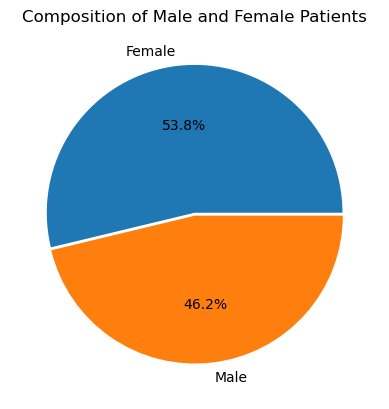

In [6]:
fig = plt.figure()

ax = fig.add_subplot()

# Plotting line
ax.pie(comp, labels=comp.index, autopct= '%1.1f%%', explode = [0.01,0.01])

#setting title
ax.set_title('Composition of Male and Female Patients')

plt.show()

# 2. The total number of patients in each age categories (total of 10 categories). 

# The total patients visited count (it ranges from a patient visited maximum of 40 times and minimum of 1 time (total of 71518 patients)

In [7]:
total = df['patient_nbr'].value_counts()
total

88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: patient_nbr, Length: 71518, dtype: int64

# It is number of patients and its patient_id visited only one time (total of 54745)

# No duplicate values

In [8]:
# These patients visited one time

total[total == 1]

65110797     1
37170729     1
25321095     1
41056614     1
61185915     1
            ..
11005362     1
98252496     1
1019673      1
13396320     1
175429310    1
Name: patient_nbr, Length: 54745, dtype: int64

# It is the number of patients and its patient_id visited more than on time (total of 16773)

In [9]:
# These patients visited more than one time

repeated = total[total != 1]
repeated

88785891    40
43140906    28
1660293     23
88227540    23
23199021    23
            ..
239535       2
44895969     2
85504905     2
39987954     2
92028474     2
Name: patient_nbr, Length: 16773, dtype: int64

# Therefore 54745 + 16773 = 71518 patients

In [10]:
a = df.loc[(df['patient_nbr'] == 100162476)]
a

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
63319,176106348,100162476,AfricanAmerican,Male,[60-70),Emergency,Discharged to home,Emergency Room,5,?,...,No,Steady,No,No,No,No,No,No,Yes,>30
101761,443847548,100162476,AfricanAmerican,Male,[70-80),Emergency,Discharged/transferred to SNF,Emergency Room,3,?,...,No,Down,No,No,No,No,No,Ch,Yes,>30


In [11]:
a['encounter_id'].max()

443847548

In [12]:
df[['encounter_id', 'patient_nbr']]

,encounter_id,patient_nbr
0,2278392,8222157
1,149190,55629189
2,64410,86047875
3,500364,82442376
4,16680,42519267
...,...,...
101761,443847548,100162476
101762,443847782,74694222
101763,443854148,41088789
101764,443857166,31693671


In [13]:
#count = 0

#while count < len(patient_id):

 #   for item in df.iterrows():
    
  #      if (item[1]['patient_nbr'] == patient_id[count]):
        
   #         print(item[1]['encounter_id'])
            
   # count = count + 1

In [14]:
df[['patient_nbr', 'age']].drop_duplicates()

,patient_nbr,age
0,8222157,[0-10)
1,55629189,[10-20)
2,86047875,[20-30)
3,82442376,[30-40)
4,42519267,[40-50)
...,...,...
101755,188574944,[40-50)
101756,140199494,[60-70)
101758,120975314,[80-90)
101761,100162476,[70-80)


In [15]:
patient_id = df['patient_nbr'].drop_duplicates()
patient_id

0           8222157
1          55629189
2          86047875
3          82442376
4          42519267
            ...    
101754    183087545
101755    188574944
101756    140199494
101758    120975314
101765    175429310
Name: patient_nbr, Length: 71518, dtype: int64

In [16]:
for item in df[['patient_nbr', 'age']].iteritems():
    
    print(item)

('patient_nbr', 0           8222157
1          55629189
2          86047875
3          82442376
4          42519267
            ...    
101761    100162476
101762     74694222
101763     41088789
101764     31693671
101765    175429310
Name: patient_nbr, Length: 101766, dtype: int64)
('age', 0          [0-10)
1         [10-20)
2         [20-30)
3         [30-40)
4         [40-50)
           ...   
101761    [70-80)
101762    [80-90)
101763    [70-80)
101764    [80-90)
101765    [70-80)
Name: age, Length: 101766, dtype: object)


In [17]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,Not Mapped,Physician Referral,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [18]:
age_cat = df['age'].value_counts()

In [19]:
age_cat

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [20]:
age_cat.sum()

101766

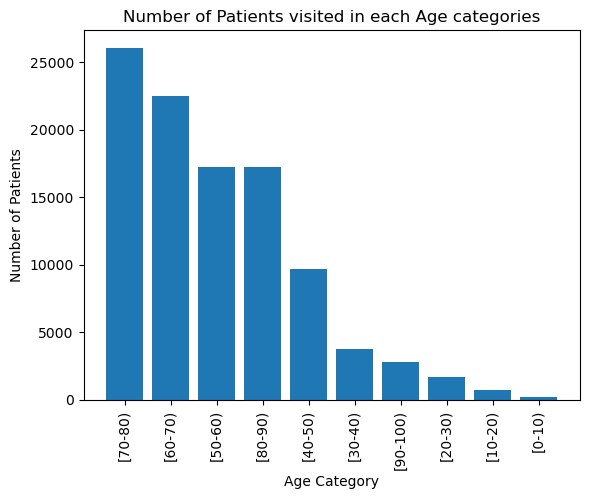

In [21]:
fig = plt.figure()
ax = fig.add_subplot()

# Plotting line
ax.bar(age_cat.index, age_cat)

# Setting title
ax.set_title('Number of Patients visited in each Age categories')

# setting labels
ax.set_xlabel('Age Category')
ax.set_ylabel('Number of Patients')

# setting ticks
ax.set_xticks(range(len(age_cat)))
ax.set_xticklabels(age_cat.index, rotation = 90)

plt.show()

# 3. The maximum number of patients visited among the 8 types of admission.

In [22]:
admission = df['admission_type_id'].value_counts()
admission

Emergency        53990
Elective         18869
Urgent           18480
Not Available     4785
Not Mapped         320
Trauma Center       21
Newborn             10
Name: admission_type_id, dtype: int64

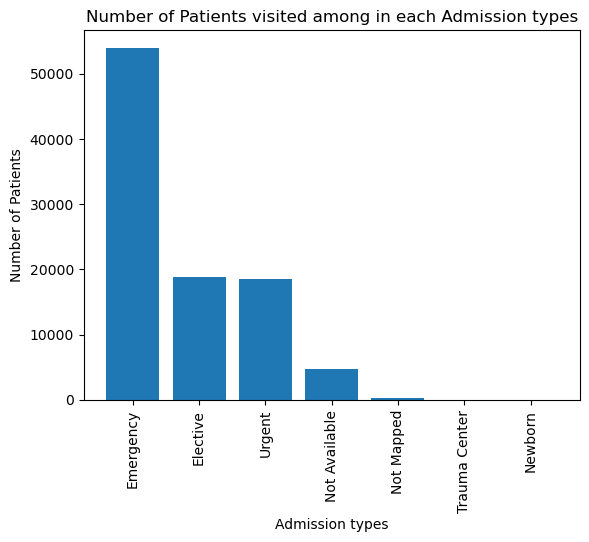

In [23]:
fig = plt.figure()
ax = fig.add_subplot()

# Plotting line
ax.bar(admission.index, admission)

# Setting title
ax.set_title('Number of Patients visited among in each Admission types')

# setting labels
ax.set_xlabel('Admission types')
ax.set_ylabel('Number of Patients')

# setting ticks
ax.set_xticks(range(len(admission)))
ax.set_xticklabels(admission.index, rotation = 90)

plt.show()


# 4. The top medical specialty who are attending the patients

In [24]:
df['medical_specialty'].value_counts()

?                                49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: medical_specialty, Length: 73, dtype: int64

In [25]:
specialty = df.loc[df['medical_specialty'] != '?']['medical_specialty']
specialty

0         Pediatrics-Endocrinology
9                 InternalMedicine
12          Family/GeneralPractice
13          Family/GeneralPractice
17                      Cardiology
                    ...           
101735            Emergency/Trauma
101743            Emergency/Trauma
101747            InternalMedicine
101749                 Orthopedics
101764             Surgery-General
Name: medical_specialty, Length: 51817, dtype: object

In [26]:
specialty_sort = specialty.value_counts()[:5]
specialty_sort

InternalMedicine          14635
Emergency/Trauma           7565
Family/GeneralPractice     7440
Cardiology                 5352
Surgery-General            3099
Name: medical_specialty, dtype: int64

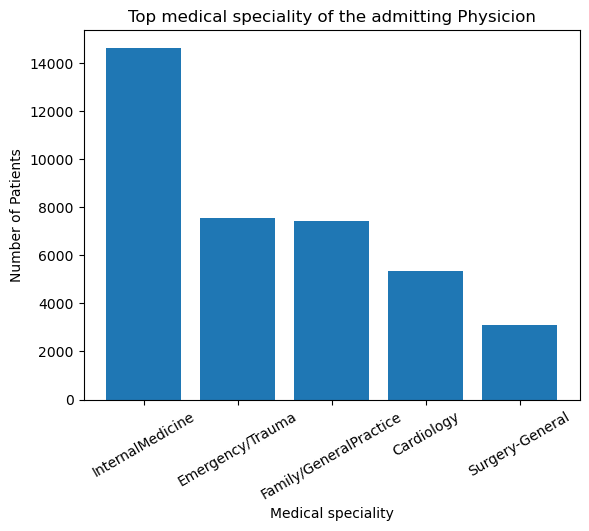

In [27]:
fig = plt.figure()
ax = fig.add_subplot()

# Plotting line
ax.bar(specialty_sort.index, specialty_sort)

# setting title
ax.set_title('Top medical speciality of the admitting Physicion')

# setting labels
ax.set_xlabel('Medical speciality')
ax.set_ylabel('Number of Patients')

# setting ticks
ax.set_xticks(range(len(specialty_sort.index)))
ax.set_xticklabels(specialty_sort.index, rotation=30)

plt.show()

# 5. The most frequent (top 5) discharge types for the diabetic patients over all the hospitals

In [28]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,Not Mapped,Physician Referral,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [29]:
discharge = df['discharge_disposition_id'].value_counts()[:5]
discharge

Discharged to home                                                                   60234
Discharged/transferred to SNF                                                        13954
Discharged/transferred to home with home health service                              12902
Discharged/transferred to another short term hospital                                 2128
Discharged/transferred to another rehab fac including rehab units of a hospital .     1993
Name: discharge_disposition_id, dtype: int64

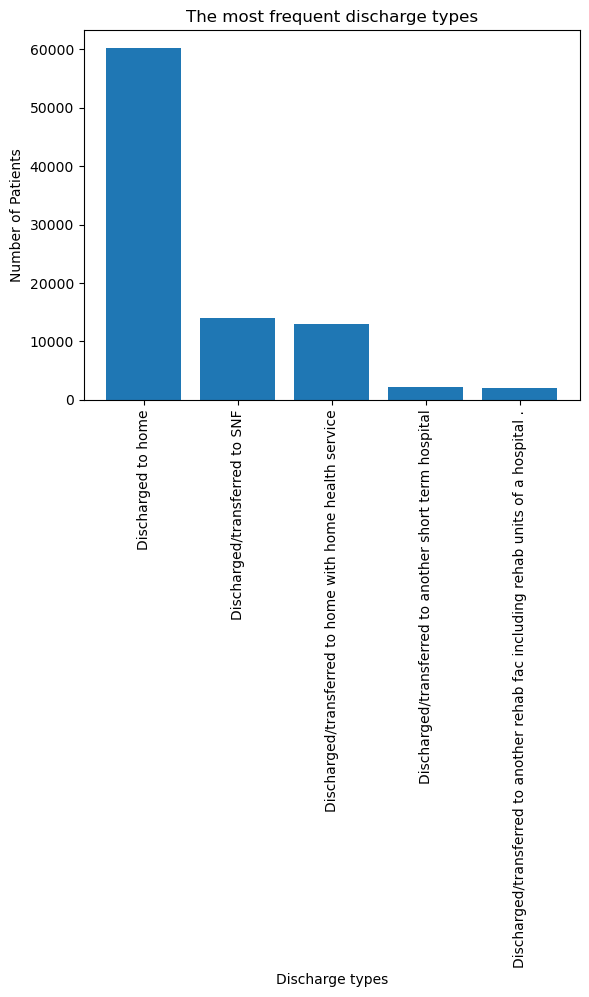

In [30]:
fig = plt.figure()
ax = fig.add_subplot()

# plotting line
ax.bar(discharge.index, discharge)

# setting title
ax.set_title('The most frequent discharge types')

# setting labels
ax.set_xlabel('Discharge types')
ax.set_ylabel('Number of Patients')

# setting ticks
ax.set_xticks(range(len(discharge)))
ax.set_xticklabels(discharge.index, rotation=90)


plt.show()

# 6. The most frequent (top 5) admission sources for the diabetic patients over all the hospitals

In [31]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,Not Mapped,Physician Referral,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [32]:
admission_source = df['admission_source_id'].value_counts()[:5]
admission_source

Emergency Room                                57494
Physician Referral                            29565
Transfer from a hospital                       3187
Transfer from another health care facility     2264
Clinic Referral                                1104
Name: admission_source_id, dtype: int64

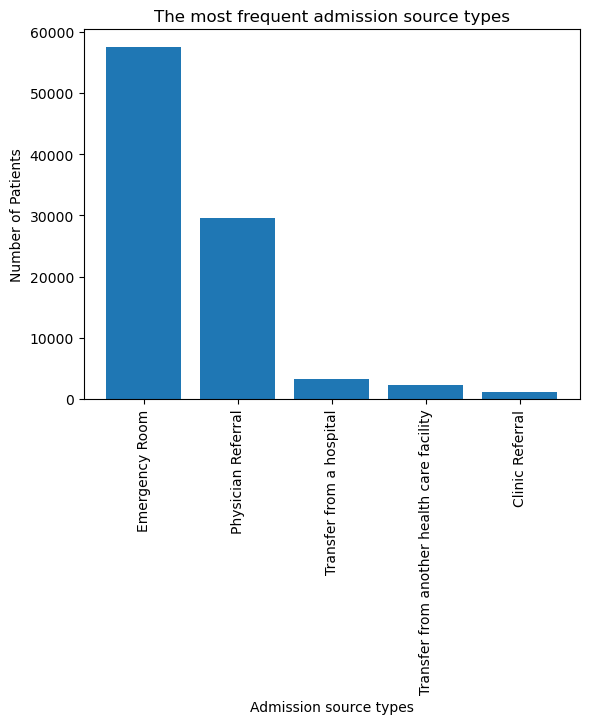

In [33]:
fig = plt.figure()
ax = fig.add_subplot()

# plotting line
ax.bar(admission_source.index, admission_source)

# setting title
ax.set_title('The most frequent admission source types')

# setting labels
ax.set_xlabel('Admission source types')
ax.set_ylabel('Number of Patients')

# setting ticks
ax.set_xticks(range(len(admission_source)))
ax.set_xticklabels(admission_source.index, rotation=90)

plt.show()

In [34]:
df[['gender', 'admission_source_id']]

,gender,admission_source_id
0,Female,Physician Referral
1,Female,Emergency Room
2,Female,Emergency Room
3,Male,Emergency Room
4,Male,Emergency Room
...,...,...
101761,Male,Emergency Room
101762,Female,Transfer from a Skilled Nursing Facility (SNF)
101763,Male,Emergency Room
101764,Female,Emergency Room


In [35]:
male_add = df.loc[df['gender'] == 'Male']['admission_type_id']
male_add

3         Emergency
4         Emergency
5            Urgent
6          Elective
7         Emergency
            ...    
101753    Emergency
101759    Emergency
101761    Emergency
101763    Emergency
101765    Emergency
Name: admission_type_id, Length: 47055, dtype: object

In [36]:
val1 = male_add.value_counts()
val1

Emergency        24540
Elective          9028
Urgent            8586
Not Available     2176
Not Mapped         144
Trauma Center       12
Newborn              7
Name: admission_type_id, dtype: int64

In [37]:
female_add = df.loc[df['gender'] == 'Female']['admission_type_id']
female_add

0               NaN
1         Emergency
2         Emergency
8            Urgent
9          Elective
            ...    
101757    Emergency
101758    Emergency
101760    Emergency
101762    Emergency
101764       Urgent
Name: admission_type_id, Length: 54708, dtype: object

In [38]:
val2 = female_add.value_counts()
val2

Emergency        29448
Urgent            9894
Elective          9840
Not Available     2609
Not Mapped         176
Trauma Center        9
Newborn              3
Name: admission_type_id, dtype: int64

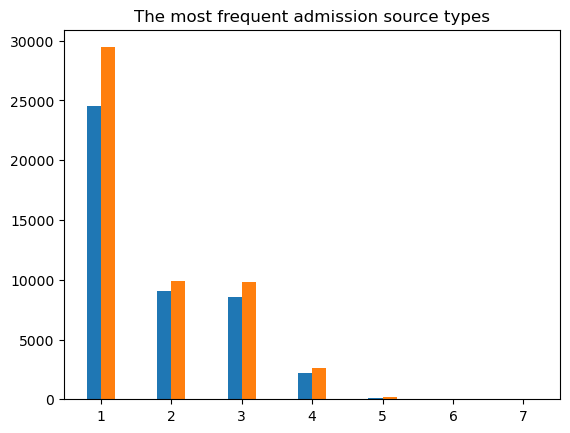

In [39]:
fig = plt.figure()
ax = fig.add_subplot()

x = np.arange(1, len(val1.index)+1)

# plotting line
ax.bar(x-0.1, val1, width=0.2)
ax.bar(x+0.1, val2, width=0.2)

# setting title
ax.set_title('The most frequent admission source types')


plt.show()

# 7. The max_glu_serum test result conducted among the visited patients

In [40]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,Not Mapped,Physician Referral,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [41]:
df['max_glu_serum'].value_counts()

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

In [42]:
max_glu_serum = df.loc[df['max_glu_serum'] != 'None']['max_glu_serum'].value_counts()
max_glu_serum

Norm    2597
>200    1485
>300    1264
Name: max_glu_serum, dtype: int64

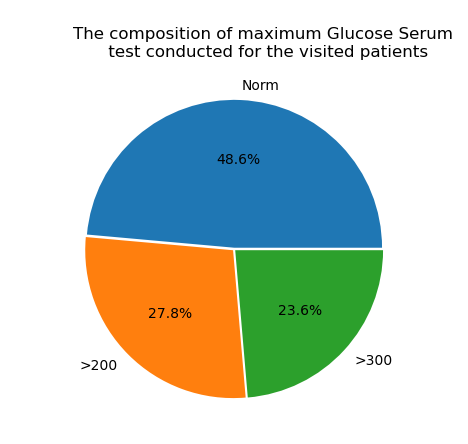

In [43]:
fig = plt.figure()
ax = fig.add_subplot()

# plotting line
ax.pie(max_glu_serum, labels=max_glu_serum.index, autopct='%1.1f%%', explode=[0.01,0.01,0.01])

# setting title
ax.set_title('''
            The composition of maximum Glucose Serum 
             test conducted for the visited patients''')

plt.show()

# 8. A1C test conducted among the visited patients

In [44]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,Not Mapped,Physician Referral,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [45]:
df['A1Cresult'].value_counts()

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

In [46]:
a1c_result = df.loc[df['A1Cresult'] != 'None']['A1Cresult'].value_counts()
a1c_result

>8      8216
Norm    4990
>7      3812
Name: A1Cresult, dtype: int64

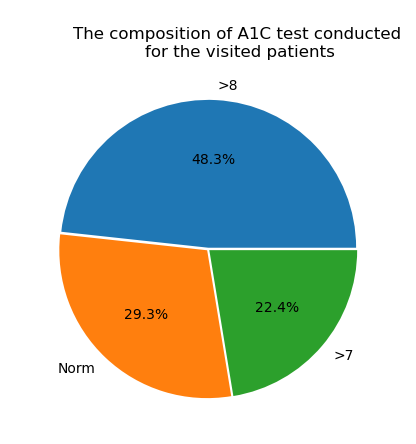

In [47]:
fig = plt.figure()
ax = fig.add_subplot()

# plotting line
ax.pie(a1c_result, labels=a1c_result.index, autopct='%1.1f%%', explode = [0.01,0.01,0.01])

# setting title
ax.set_title('''
            The composition of A1C test conducted 
            for the visited patients''')

plt.show()

# 9. The Total number of visited patient stayed for 1 to 14 days.

In [48]:
df['time_in_hospital']

0          1
1          3
2          2
3          2
4          1
          ..
101761     3
101762     5
101763     1
101764    10
101765     6
Name: time_in_hospital, Length: 101766, dtype: int64

In [49]:
time = df['time_in_hospital'].value_counts()
time

3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: time_in_hospital, dtype: int64

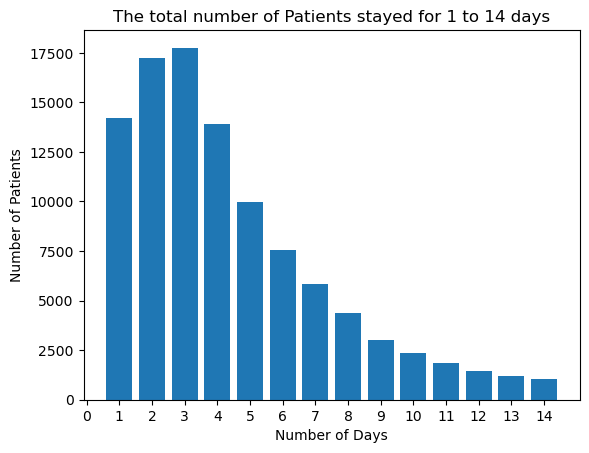

In [50]:
fig = plt.figure()
ax = fig.add_subplot()

# plotting line
ax.bar(time.index, time)

# setting ticks
ax.set_xticks(range(len(time) + 1))

# setting lables
ax.set_xlabel('Number of Days')
ax.set_ylabel('Number of Patients')

# setting title
ax.set_title('The total number of Patients stayed for 1 to 14 days')


plt.show()

# 10. The readmission rates over all the hospitals for the diabetic patients. 

In [51]:
readmitted = df['readmitted'].value_counts()
readmitted

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

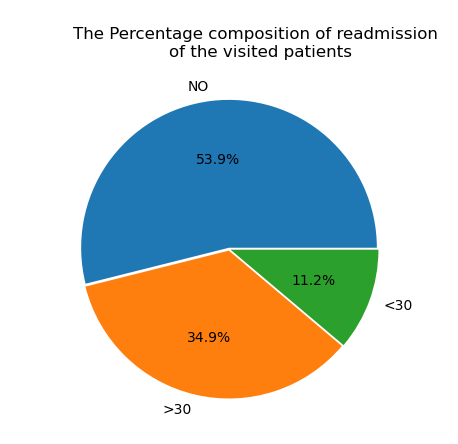

In [52]:
fig = plt.figure()
ax = fig.add_subplot()

# plotting line
ax.pie(readmitted, labels=readmitted.index, autopct='%1.1f%%', explode = [0.01,0.01,0.01])

# setting title
ax.set_title('''
            The Percentage composition of readmission  
            of the visited patients''')

plt.show()

# 11. The total number of visited patients given the drug molecule along with the categories (up, down, steady, no).

In [53]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,Not Mapped,Physician Referral,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [54]:
df['metformin'].value_counts()

No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64

In [55]:
metformin = df.loc[df['metformin'] != 'No']['metformin'].value_counts()
metformin

Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64

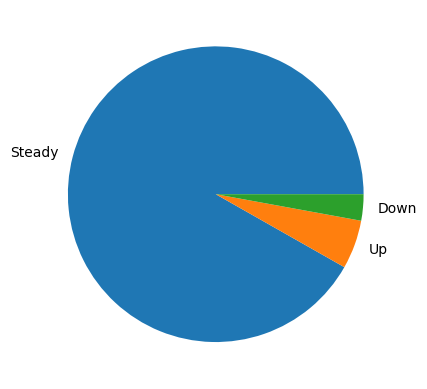

In [56]:
fig = plt.figure()
ax = fig.add_subplot()

# plotting line

ax.pie(metformin, labels=metformin.index)

plt.show()

In [57]:
def repl(val):
    
    if val == 'Male':
        
        return 1
    
    elif val == 'Female':
        
        return 0
    
    else:
        
        return val

In [58]:
repl('Unkowm')

'Unkowm'

In [59]:
df.loc[(df['gender'] != 1) & (df['gender'] != 0)]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,Not Mapped,Physician Referral,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),Emergency,Discharged/transferred to SNF,Emergency Room,3,?,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),Emergency,Discharged/transferred to ICF,Transfer from a Skilled Nursing Facility (SNF),5,?,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),Emergency,Discharged to home,Emergency Room,1,?,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),Urgent,Discharged/transferred to SNF,Emergency Room,10,Surgery-General,...,No,Up,No,No,No,No,No,Ch,Yes,NO
